# Lasso Regression

In [1]:
import numpy as np 
from scipy.sparse import random as sprandn
import matplotlib.pyplot as plt

### Problem data

In [2]:
m = 500 	#number of examples
n = 2500	#number of features
A = np.matrix(np.random.randn(m,n))
A = (A-np.mean(A,0))/np.std(A,0) # normalize columns
x_r = sprandn(n,1,density=0.05)
b = A*x_r + np.sqrt(0.001)*np.matrix(np.random.randn(m,1))

# cached computations
AtA  = A.T*A #n*n
Atb  = A.T*b #n*1

### Global constants and defaults

In [3]:
Max_iter = 100
ABSTOL = 1e-3
RELTOL   = 1e-2 #error tolerance for ADMM

# 1.1 Proximal gradient method

In [4]:
def objective(A,x,b,gamma):
	'''
	objective function: f(x) + g(x)
	f(x) = 1/2||Ax-b||^2
	g(x) = gamma*|x|
	A : independt variables m*n
	x : parameters n*1
	b : m*1
	''' 
	return f(A,x,b) + gamma*np.sum(np.abs(x))

def f(A,x,b):
	'''
	f(x) = 1/2||Ax-b||^2 m*1
	'''
	return 0.5*(np.linalg.norm(A*x-b)**2)

In [5]:
def gradf(AtA,x,Atb):
	'''
	gradient of f(X) n*1
	'''
	return AtA*x-Atb 

def uppbd(A,AtA,Atb,x,x_1,b,lamdaK):
	'''
	m*1
	'''
	xDiff = x_1 - x
	return f(A,x,b) + gradf(AtA,x,Atb).T*xDiff + 1.0/(2.0*lamdaK)* np.sum(np.multiply(xDiff,xDiff))
    

In [6]:
def proxop(v,lamdaK):
	'''
	calculate proximal operater
	lamdaK: learning rate
	'''
	zero = np.matrix(np.zeros(np.shape(v)))
	return np.multiply(np.sign(v),np.maximum(np.abs(v)-lamdaK,zero))

In [7]:
def proxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL):

	x = np.matrix(np.zeros((np.shape(A)[1],1)))
	
	obj = []
	for k in range(Max_iter):
		while True:
			x_1 = proxop(x-lamdaK*gradf(AtA,x,Atb),lamdaK*gamma)
			if f(A,x_1,b) <= uppbd(A,AtA,Atb,x,x_1,b,lamdaK):
				break
			else:
				lamdaK = beta*lamdaK

		obj.append(objective(A,x_1,b,gamma))

		# terminating condition
		if k > 1 and np.linalg.norm(objective(A,x_1,b,gamma) - objective(A,x,b,gamma)) < ABSTOL:
			break

		x = x_1
	return x_1, obj

In [8]:
if __name__ == '__main__':
	lamdaK = 1
	beta = 0.5 #decreasing parameter for lambda
	# gamma =  0.1*np.linalg.norm(Atb,np.inf) 
	gamma =  0.01

	x_1,obj= proxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL)

In [9]:
len(obj)

25

In [10]:
obj

[1541.9457101415242,
 523.89749759173708,
 224.09890011755471,
 106.57496660768732,
 54.11042303703028,
 28.847286762940659,
 16.06093052904777,
 9.3562037103310249,
 5.7453666937779717,
 3.759540870521243,
 2.6486021289455359,
 2.0182612679795917,
 1.6562722519835358,
 1.4462333989902141,
 1.3232659495311008,
 1.2507129441568703,
 1.2076055092565525,
 1.1818358536426674,
 1.1663441915868804,
 1.156983680916295,
 1.1513000129463158,
 1.1478324607220927,
 1.1457066096714643,
 1.1443962339456846,
 1.1435832710550462]

# 1.2 Accelerated proximal gradient method

In [11]:
def AccProxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL):

	x = np.matrix(np.zeros((np.shape(A)[1],1)))
	xprev = x
	
	obj = []
	for k in range(Max_iter):
		
		y = x + (1/(k+3)) * (x-xprev)
		
		while True:
			x_1 = proxop(y-lamdaK*gradf(AtA,y,Atb),lamdaK*gamma)
			if f(A,x_1,b) <= uppbd(A,AtA,Atb,y,x_1,b,lamdaK):
				break
			else:
				lamdaK = beta*lamdaK

		obj.append(objective(A,x_1,b,gamma))

		# terminating condition
		if k > 1 and np.linalg.norm(objective(A,x_1,b,gamma) - objective(A,x,b,gamma)) < ABSTOL:
			break

		xprev = x
		x = x_1

	
	return x_1, obj

In [12]:
if __name__ == '__main__':
	lamdaK = 1
	beta = 0.5 #decreasing parameter for lambda
	# gamma =  0.1*np.linalg.norm(Atb,np.inf) 
	gamma =  0.01

	x_1,obj2= AccProxgd(Max_iter,lamdaK,gamma,AtA,Atb,A,beta,b,ABSTOL)

In [13]:
len(obj2)

23

In [14]:
obj2

[1541.9457101415242,
 390.35089063650514,
 131.5939534314976,
 54.418243289865345,
 25.467556117771608,
 13.020038640084156,
 7.2026018510418188,
 4.333308458624539,
 2.8634063682718232,
 2.0885798209943074,
 1.6708214046995298,
 1.4414025937173873,
 1.3134765868592122,
 1.2412225104678436,
 1.1999559582542674,
 1.1761608027507389,
 1.1623222833127242,
 1.1542123159249511,
 1.1494252279798014,
 1.1465799878123624,
 1.1448770054792037,
 1.1438497246462798,
 1.1432242626777227]

# 1.3 ADMM

In [15]:
def proxf(AtA,v,Atb,n):
	'''
	1/2||Ax-b||_2^2
	'''
	return np.linalg.inv(0.01*np.identity(n)+AtA)*(Atb+0.01*v)

In [16]:
def ADMM(Max_iter,lamdaK,gamma,AtA,Atb,A,b,ABSTOL,RELTOL,n):
	omega = 0.01
	ldr = 1/lamdaK
	x = np.matrix(np.random.randn(n,1))
	z = np.matrix(np.random.randn(n,1))
	u = np.matrix(np.random.randn(n,1))
    
    
	obj = []
	for k in range(Max_iter):
		# update x
		x_1 = proxf(AtA,(z-u),Atb,n)
		# update z
		z_1 = proxop(x_1+u,(lamdaK*gamma)/omega) 
		# update u
		u_1 = u + omega*(x_1 - z_1)
        
		ls = f(A,x_1,b)+ gamma*np.sum(np.abs(z_1))
		obj.append(ls)
        
# 		# terminating condition
# 		xz_norm = np.linalg.norm(x_1-z_1)
# 		zz_norm = np.linalg.norm(-ldr*(z_1 - z))
# 		eps_pri = np.sqrt(n)*ABSTOL + RELTOL*np.maximum(np.linalg.norm(x_1),np.linalg.norm(-z_1))
# 		eps_dual = np.sqrt(n)*ABSTOL + RELTOL*np.linalg.norm(ldr*u_1)
# 		if xz_norm < eps_pri and zz_norm < eps_dual:
# 			break
		if k > 1 and np.linalg.norm(ls - (f(A,x,b)+ gamma*np.sum(np.abs(z)))) < ABSTOL:
			break

		z = z_1
		x = x_1
		u = u_1        

	return x_1, obj

In [17]:
if __name__ == '__main__':
	lamdaK = 1
	gamma =  0.01

	x_1,obj3 = ADMM(Max_iter,lamdaK,gamma,AtA,Atb,A,b,ABSTOL,RELTOL,n)

In [18]:
len(obj3)

12

In [19]:
obj3

[4.428960405209649,
 0.93027049163626008,
 0.3296634538522093,
 0.21686740541878458,
 0.19815308504245038,
 0.20326882874459723,
 0.21303296008428019,
 0.22009232915031698,
 0.22455270116374912,
 0.22728770842021079,
 0.22869774986155245,
 0.22916668811247651]

# plots

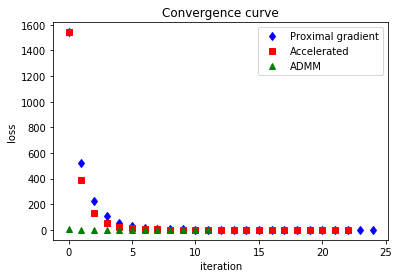

In [20]:
%matplotlib inline

plt.plot(range(len(obj)), obj, 'bd',range(len(obj2)), obj2, 'rs',range(len(obj3)), obj3, 'g^')
plt.title('Convergence curve')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.legend(['Proximal gradient', 'Accelerated','ADMM'], loc='upper right')

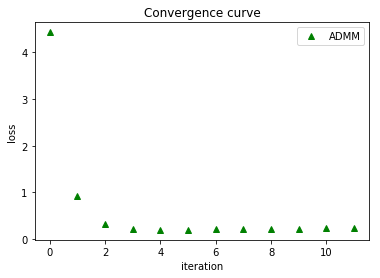

In [21]:
%matplotlib inline
plt.plot(range(len(obj3)), obj3, 'g^')
plt.title('Convergence curve')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['ADMM'], loc='upper right')

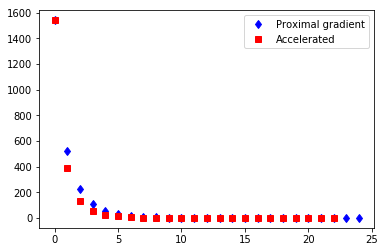

In [22]:
plt.plot(range(len(obj)), obj, 'bd',range(len(obj2)), obj2, 'rs')
plt.legend(['Proximal gradient', 'Accelerated'], loc='upper right')